In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from environment import TreasureCube

In [82]:
# you need to implement your agent based on one RL algorithm
class QAgent(object):
    def __init__(self):
        self.learning_rate = 0.5
        self.discount = 0.99
        self.exploration_rate = 0.01
        self.action_space = ['left','right','forward','backward','up','down'] # in TreasureCube
        self.Q = np.zeros([64,6])

    def take_action(self, state):
        if np.random.random() > self.exploration_rate:
            # Get action from Q table
            print("current state: " + state)
            state = [int(d) for d in str(state)]
            state = state[0] + state[1]*4 + state[2]*16
            action = self.action_space[np.argmax(self.Q[state])]
        else:
            print("random action!!!")
            action = random.choice(self.action_space)
        return action

    # implement your train/update function to update self.V or self.Q
    # you should pass arguments to the train function
    def train(self, state, action, next_state, reward):
        state = [int(d) for d in str(state)]
        state = state[0] + state[1]*4 + state[2]*16
        
        next_state = [int(d) for d in str(next_state)]
        next_state = next_state[0] + next_state[1]*4 + next_state[2]*16
        
        # Maximum possible Q value in next step (for new state)
        max_future_q = np.max(self.Q[next_state])

        # Current Q value (for current state and performed action)
        current_q = self.Q[state,self.action_space.index(action)]

        # And here's our equation for a new Q value for current state and action
        new_q = (1 - self.learning_rate) * current_q + self.learning_rate * (reward + self.discount * max_future_q)

        # Update Q table with new Q value
        self.Q[state,self.action_space.index(action)] = new_q
        
    def q_table(self):
        return self.Q

def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = QAgent()
    SHOW_EP = 100
    SHOW_STEP = 10
    # For stats
    ep_rewards = []
    aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}
    ep_steps = []

    for epsisode_num in range(0, max_episode):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            # you can comment the following two lines, if the output is too much
            if epsisode_num % SHOW_EP == 0 and t % SHOW_STEP == 0:
                env.render() # comment
            print(f'epsisode: {epsisode_num},step: {t}, action: {action}, reward: {reward}') # comment
            t += 1
            agent.train(state, action, next_state, reward)
            state = next_state
        print(f'epsisode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        ep_rewards.append(episode_reward)
        ep_steps.append(t)
        aggr_ep_rewards['ep'].append(epsisode_num)
        aggr_ep_rewards['avg'].append(sum(ep_rewards)/(epsisode_num+1))
        aggr_ep_rewards['max'].append(max(ep_rewards))
        aggr_ep_rewards['min'].append(min(ep_rewards))
        
    return agent.q_table(),ep_rewards,aggr_ep_rewards,ep_steps

In [111]:
q,ep_rewards,aggr_ep_rewards,ep_steps = test_cube(500, 500)

current state: 000
* * * *
- + - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - G
# # # #
* * * *
epsisode: 0,step: 0, action: left, reward: -0.1
current state: 001
epsisode: 0,step: 1, action: left, reward: -0.1
current state: 001
epsisode: 0,step: 2, action: right, reward: -0.1
current state: 101
epsisode: 0,step: 3, action: left, reward: -0.1
current state: 101
epsisode: 0,step: 4, action: right, reward: -0.1
current state: 001
epsisode: 0,step: 5, action: forward, reward: -0.1
current state: 101
epsisode: 0,step: 6, action: forward, reward: -0.1
current state: 201
epsisode: 0,step: 7, action: left, reward: -0.1
current state: 301
epsisode: 0,step: 8, action: left, reward: -0.1
current state: 301
epsisode: 0,step: 9, action: right, reward: -0.1
current state: 311
* * * *
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # 

epsisode: 19,step: 19, action: up, reward: -0.1
current state: 223
epsisode: 19,step: 20, action: forward, reward: -0.1
current state: 222
epsisode: 19,step: 21, action: up, reward: -0.1
current state: 322
epsisode: 19,step: 22, action: up, reward: -0.1
current state: 323
epsisode: 19,step: 23, action: right, reward: -0.1
current state: 322
epsisode: 19,step: 24, action: up, reward: -0.1
current state: 323
epsisode: 19,step: 25, action: right, reward: -0.1
current state: 323
epsisode: 19,step: 26, action: right, reward: -0.1
current state: 223
epsisode: 19,step: 27, action: forward, reward: -0.1
current state: 323
epsisode: 19,step: 28, action: right, reward: 1
epsisode: 19, total_steps: 29 episode reward: -1.8000000000000012
current state: 000
epsisode: 20,step: 0, action: backward, reward: -0.1
current state: 000
epsisode: 20,step: 1, action: up, reward: -0.1
current state: 001
epsisode: 20,step: 2, action: up, reward: -0.1
current state: 002
epsisode: 20,step: 3, action: right, rewa

epsisode: 91,step: 22, action: up, reward: -0.1
current state: 203
epsisode: 91,step: 23, action: down, reward: -0.1
current state: 213
epsisode: 91,step: 24, action: forward, reward: -0.1
current state: 223
epsisode: 91,step: 25, action: forward, reward: -0.1
current state: 323
epsisode: 91,step: 26, action: right, reward: -0.1
current state: 323
epsisode: 91,step: 27, action: right, reward: 1
epsisode: 91, total_steps: 28 episode reward: -1.700000000000001
current state: 000
epsisode: 92,step: 0, action: up, reward: -0.1
current state: 001
epsisode: 92,step: 1, action: up, reward: -0.1
current state: 101
epsisode: 92,step: 2, action: left, reward: -0.1
current state: 001
epsisode: 92,step: 3, action: forward, reward: -0.1
random action!!!
epsisode: 92,step: 4, action: left, reward: -0.1
current state: 001
epsisode: 92,step: 5, action: down, reward: -0.1
current state: 101
epsisode: 92,step: 6, action: right, reward: -0.1
current state: 201
epsisode: 92,step: 7, action: up, reward: -0

current state: 323
epsisode: 181,step: 15, action: right, reward: 1
epsisode: 181, total_steps: 16 episode reward: -0.5000000000000002
current state: 000
epsisode: 182,step: 0, action: forward, reward: -0.1
current state: 100
epsisode: 182,step: 1, action: forward, reward: -0.1
current state: 100
epsisode: 182,step: 2, action: forward, reward: -0.1
current state: 200
epsisode: 182,step: 3, action: forward, reward: -0.1
current state: 210
epsisode: 182,step: 4, action: up, reward: -0.1
current state: 110
epsisode: 182,step: 5, action: forward, reward: -0.1
current state: 210
epsisode: 182,step: 6, action: up, reward: -0.1
current state: 211
epsisode: 182,step: 7, action: forward, reward: -0.1
current state: 201
epsisode: 182,step: 8, action: up, reward: -0.1
current state: 301
epsisode: 182,step: 9, action: right, reward: -0.1
current state: 311
epsisode: 182,step: 10, action: up, reward: -0.1
current state: 312
epsisode: 182,step: 11, action: up, reward: -0.1
current state: 313
epsisod

epsisode: 267,step: 6, action: up, reward: -0.1
current state: 313
epsisode: 267,step: 7, action: right, reward: -0.1
current state: 313
epsisode: 267,step: 8, action: right, reward: -0.1
current state: 323
epsisode: 267,step: 9, action: right, reward: 1
epsisode: 267, total_steps: 10 episode reward: 0.10000000000000009
current state: 000
epsisode: 268,step: 0, action: forward, reward: -0.1
current state: 000
epsisode: 268,step: 1, action: forward, reward: -0.1
current state: 100
epsisode: 268,step: 2, action: forward, reward: -0.1
current state: 200
epsisode: 268,step: 3, action: forward, reward: -0.1
current state: 200
epsisode: 268,step: 4, action: forward, reward: -0.1
current state: 300
epsisode: 268,step: 5, action: right, reward: -0.1
current state: 310
epsisode: 268,step: 6, action: up, reward: -0.1
current state: 311
epsisode: 268,step: 7, action: up, reward: -0.1
current state: 312
epsisode: 268,step: 8, action: up, reward: -0.1
current state: 313
epsisode: 268,step: 9, actio

epsisode: 356, total_steps: 16 episode reward: -0.5000000000000002
current state: 000
epsisode: 357,step: 0, action: forward, reward: -0.1
current state: 000
epsisode: 357,step: 1, action: forward, reward: -0.1
current state: 100
epsisode: 357,step: 2, action: forward, reward: -0.1
current state: 200
epsisode: 357,step: 3, action: forward, reward: -0.1
current state: 300
epsisode: 357,step: 4, action: right, reward: -0.1
current state: 200
epsisode: 357,step: 5, action: forward, reward: -0.1
current state: 201
epsisode: 357,step: 6, action: down, reward: -0.1
current state: 200
epsisode: 357,step: 7, action: forward, reward: -0.1
current state: 200
epsisode: 357,step: 8, action: forward, reward: -0.1
current state: 201
epsisode: 357,step: 9, action: down, reward: -0.1
current state: 201
epsisode: 357,step: 10, action: left, reward: -0.1
current state: 201
epsisode: 357,step: 11, action: down, reward: -0.1
current state: 101
epsisode: 357,step: 12, action: right, reward: -0.1
current st

current state: 020
epsisode: 445,step: 10, action: up, reward: -0.1
current state: 020
epsisode: 445,step: 11, action: up, reward: -0.1
current state: 021
epsisode: 445,step: 12, action: up, reward: -0.1
current state: 022
epsisode: 445,step: 13, action: up, reward: -0.1
current state: 023
epsisode: 445,step: 14, action: forward, reward: -0.1
current state: 013
epsisode: 445,step: 15, action: right, reward: -0.1
current state: 023
epsisode: 445,step: 16, action: forward, reward: -0.1
current state: 123
epsisode: 445,step: 17, action: forward, reward: -0.1
current state: 223
epsisode: 445,step: 18, action: forward, reward: -0.1
current state: 323
epsisode: 445,step: 19, action: right, reward: 1
epsisode: 445, total_steps: 20 episode reward: -0.9000000000000006
current state: 000
epsisode: 446,step: 0, action: up, reward: -0.1
current state: 000
epsisode: 446,step: 1, action: up, reward: -0.1
current state: 001
epsisode: 446,step: 2, action: up, reward: -0.1
current state: 001
epsisode: 

In [112]:
print("Maximum number of steps for last 100 episodes: " + str(max(ep_steps[-100:])))
print("Average number of steps for last 100 episodes: " + str(sum(ep_steps[-100:])/100))

Maximum number of steps for last 100 episodes: 42
Average number of steps for last 100 episodes: 16.19


In [113]:
count = 0

for i in ep_steps:
    if i < 15:
        count += 1
print("percentage of episodes below 15 steps : " + str(count/len(ep_steps)))

percentage of episodes below 15 steps : 0.414


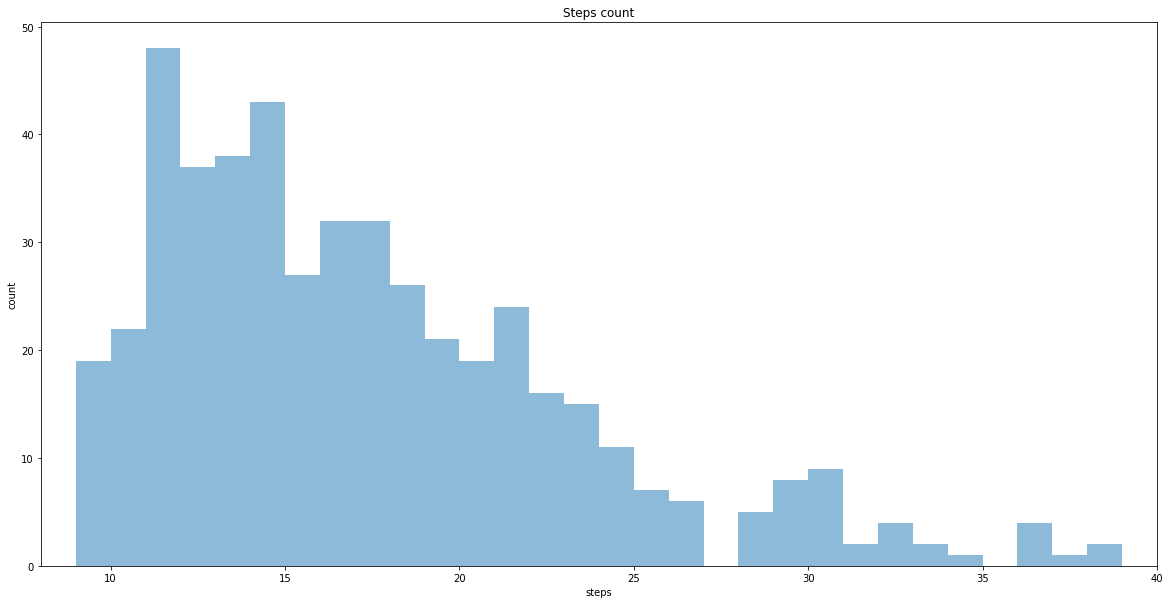

In [114]:
plt.figure(figsize=(20,10))
bins = np.arange(9, 40, 1) # fixed bin size

plt.xlim([8, 40])

plt.hist(ep_steps, bins=bins, alpha=0.5)
plt.title('Steps count')
plt.xlabel('steps')
plt.ylabel('count')

plt.show()

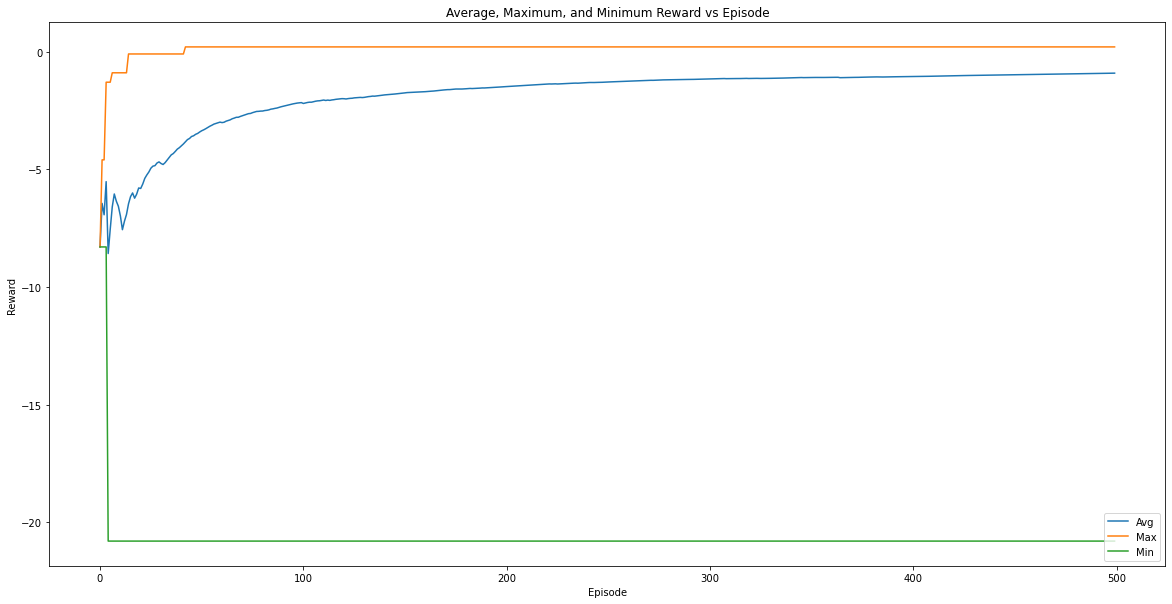

In [25]:
plt.figure(figsize=(20,10))
plt.plot(aggr_ep_rewards['avg'])
plt.plot(aggr_ep_rewards['max'])
plt.plot(aggr_ep_rewards['min'])
plt.title('Average, Maximum, and Minimum Reward vs Episode')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.legend(['Avg', 'Max', 'Min'], loc='lower right')
plt.show()

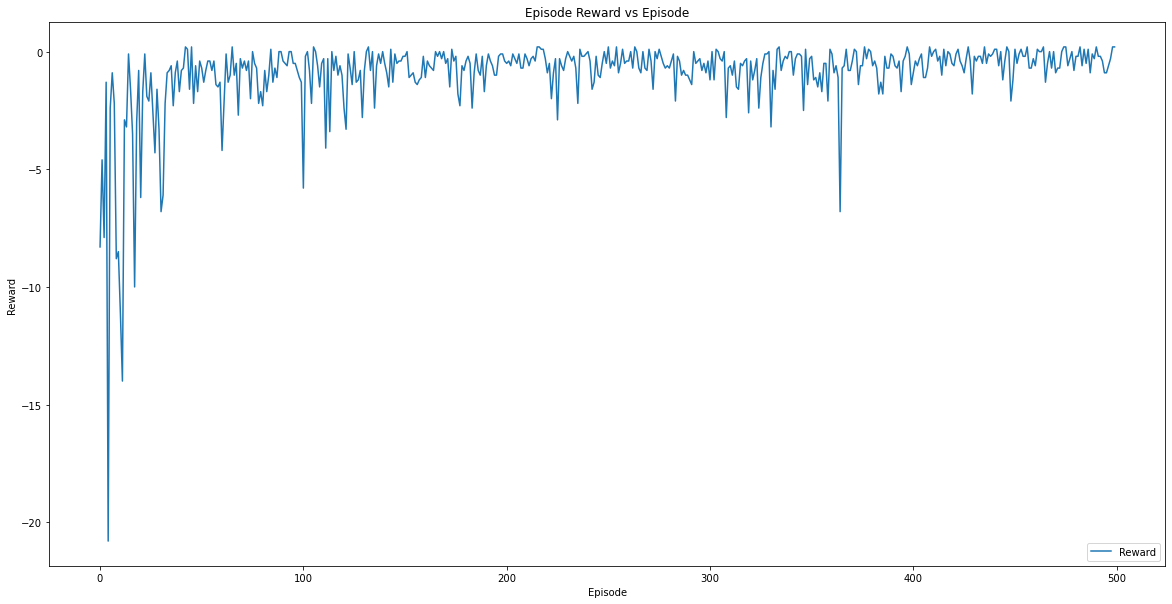

In [26]:
plt.figure(figsize=(20,10))
plt.plot(ep_rewards)
plt.title('Episode Reward vs Episode')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.legend(['Reward'], loc='lower right')
plt.show()

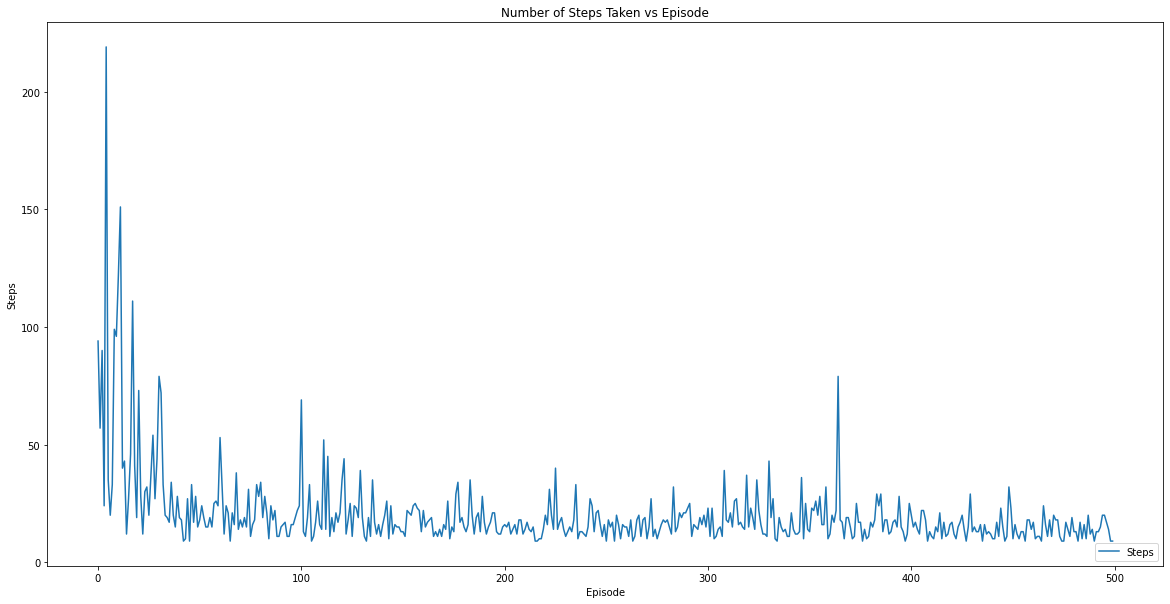

In [27]:
plt.figure(figsize=(20,10))
plt.plot(ep_steps)
plt.title('Number of Steps Taken vs Episode')
plt.ylabel('Steps')
plt.xlabel('Episode')
plt.legend(['Steps'], loc='lower right')
plt.show()

In [28]:
q

array([[-0.65894115, -0.48822217, -0.58136007, -0.56571879, -0.35183794,
        -0.67283771],
       [-0.64277037, -0.64210836, -0.22437279, -0.6790957 , -0.65455588,
        -0.64571604],
       [-0.52813359, -0.5172002 ,  0.00489964, -0.5389945 , -0.50707034,
        -0.52038202],
       [-0.4888987 ,  0.21338179, -0.4888987 , -0.456687  , -0.44710121,
        -0.47810946],
       [-0.60967646, -0.44236769, -0.61846516, -0.58686341, -0.36583845,
        -0.62142937],
       [-0.49958923, -0.48462686, -0.24633447, -0.51176491, -0.51488448,
        -0.4958269 ],
       [-0.44213646, -0.06356866, -0.43358788, -0.40364399, -0.39619039,
        -0.41724007],
       [-0.37777112, -0.34482664, -0.34479353, -0.32882641, -0.02239059,
        -0.36307899],
       [-0.51676859, -0.49681939, -0.48232131, -0.52456563, -0.38393595,
        -0.53892955],
       [-0.41979367, -0.20186733, -0.40172806, -0.41956601, -0.31998393,
        -0.40384687],
       [-0.29460305, -0.35111777, -0.30284277, -0.

In [29]:
index = []

for i in range(0,4):
    for j in range(0,4):
        for h in range(0,4):
            x = str(i) + ',' + str(j) + ',' + str(h)
            index.append(x)

In [30]:
import pandas as pd

q_table_frame = pd.DataFrame(index,columns=['Grid Position'])
q_table_frame.head()

,Grid Position
0,"0,0,0"
1,"0,0,1"
2,"0,0,2"
3,"0,0,3"
4,"0,1,0"


In [31]:
df = pd.DataFrame(data=q, columns=['left','right','forward','backward','up','down'])
df.head()

,left,right,forward,backward,up,down
0,-0.658941,-0.488222,-0.581360,-0.565719,-0.351838,-0.672838
1,-0.642770,-0.642108,-0.224373,-0.679096,-0.654556,-0.645716
2,-0.528134,-0.517200,0.004900,-0.538995,-0.507070,-0.520382
3,-0.488899,0.213382,-0.488899,-0.456687,-0.447101,-0.478109
4,-0.609676,-0.442368,-0.618465,-0.586863,-0.365838,-0.621429


In [32]:
q_table_frame = pd.concat([q_table_frame, df], axis=1)
q_table_frame.head()   

,Grid Position,left,right,forward,backward,up,down
0,"0,0,0",-0.658941,-0.488222,-0.581360,-0.565719,-0.351838,-0.672838
1,"0,0,1",-0.642770,-0.642108,-0.224373,-0.679096,-0.654556,-0.645716
2,"0,0,2",-0.528134,-0.517200,0.004900,-0.538995,-0.507070,-0.520382
3,"0,0,3",-0.488899,0.213382,-0.488899,-0.456687,-0.447101,-0.478109
4,"0,1,0",-0.609676,-0.442368,-0.618465,-0.586863,-0.365838,-0.621429


In [33]:
q_table_frame = q_table_frame.set_index('Grid Position')
q_table_frame.head(64)

,left,right,forward,backward,up,down
Grid Position,,,,,,
"0,0,0",-0.658941,-0.488222,-0.581360,-0.565719,-0.351838,-0.672838
"0,0,1",-0.642770,-0.642108,-0.224373,-0.679096,-0.654556,-0.645716
"0,0,2",-0.528134,-0.517200,0.004900,-0.538995,-0.507070,-0.520382
"0,0,3",-0.488899,0.213382,-0.488899,-0.456687,-0.447101,-0.478109
"0,1,0",-0.609676,-0.442368,-0.618465,-0.586863,-0.365838,-0.621429
...,...,...,...,...,...,...
"3,2,3",0.417454,0.916450,0.383152,0.257140,-0.050000,0.475000
"3,3,0",-0.288354,-0.296275,-0.271619,-0.014972,-0.272016,-0.261536
"3,3,1",0.293835,-0.198505,-0.210880,-0.180066,-0.198505,-0.076044


In [34]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
q_table_frame

,left,right,forward,backward,up,down
Grid Position,,,,,,
"0,0,0",-0.658941,-0.488222,-0.581360,-0.565719,-0.351838,-0.672838
"0,0,1",-0.642770,-0.642108,-0.224373,-0.679096,-0.654556,-0.645716
"0,0,2",-0.528134,-0.517200,0.004900,-0.538995,-0.507070,-0.520382
"0,0,3",-0.488899,0.213382,-0.488899,-0.456687,-0.447101,-0.478109
"0,1,0",-0.609676,-0.442368,-0.618465,-0.586863,-0.365838,-0.621429
"0,1,1",-0.499589,-0.484627,-0.246334,-0.511765,-0.514884,-0.495827
"0,1,2",-0.442136,-0.063569,-0.433588,-0.403644,-0.396190,-0.417240
"0,1,3",-0.377771,-0.344827,-0.344794,-0.328826,-0.022391,-0.363079
"0,2,0",-0.516769,-0.496819,-0.482321,-0.524566,-0.383936,-0.538930


In [74]:
q,ep_rewards,aggr_ep_rewards,ep_steps = test_cube(1000, 500)

current state: 000
* * * *
- + - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - G
# # # #
* * * *
epsisode: 0,step: 0, action: left, reward: -0.1
current state: 001
epsisode: 0,step: 1, action: left, reward: -0.1
current state: 001
epsisode: 0,step: 2, action: right, reward: -0.1
current state: 101
epsisode: 0,step: 3, action: left, reward: -0.1
current state: 101
epsisode: 0,step: 4, action: right, reward: -0.1
current state: 001
epsisode: 0,step: 5, action: forward, reward: -0.1
current state: 101
epsisode: 0,step: 6, action: forward, reward: -0.1
current state: 201
epsisode: 0,step: 7, action: left, reward: -0.1
current state: 301
epsisode: 0,step: 8, action: left, reward: -0.1
current state: 301
epsisode: 0,step: 9, action: right, reward: -0.1
current state: 311
* * * *
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # #
- - - -
- - - -
- - - -
- - - -
# # # 

epsisode: 10,step: 29, action: backward, reward: -0.1
current state: 121
epsisode: 10,step: 30, action: up, reward: -0.1
current state: 122
epsisode: 10,step: 31, action: down, reward: -0.1
current state: 132
epsisode: 10,step: 32, action: up, reward: -0.1
current state: 133
epsisode: 10,step: 33, action: up, reward: -0.1
current state: 133
epsisode: 10,step: 34, action: down, reward: -0.1
current state: 132
epsisode: 10,step: 35, action: left, reward: -0.1
current state: 232
epsisode: 10,step: 36, action: down, reward: -0.1
current state: 231
epsisode: 10,step: 37, action: forward, reward: -0.1
current state: 221
epsisode: 10,step: 38, action: up, reward: -0.1
current state: 222
epsisode: 10,step: 39, action: backward, reward: -0.1
current state: 223
epsisode: 10,step: 40, action: down, reward: -0.1
current state: 222
epsisode: 10,step: 41, action: up, reward: -0.1
current state: 223
epsisode: 10,step: 42, action: up, reward: -0.1
current state: 223
epsisode: 10,step: 43, action: back

epsisode: 72,step: 2, action: up, reward: -0.1
current state: 111
epsisode: 72,step: 3, action: forward, reward: -0.1
current state: 121
epsisode: 72,step: 4, action: forward, reward: -0.1
current state: 221
epsisode: 72,step: 5, action: forward, reward: -0.1
current state: 321
epsisode: 72,step: 6, action: right, reward: -0.1
current state: 331
epsisode: 72,step: 7, action: up, reward: -0.1
current state: 332
epsisode: 72,step: 8, action: up, reward: 1
epsisode: 72, total_steps: 9 episode reward: 0.20000000000000007
current state: 000
epsisode: 73,step: 0, action: right, reward: -0.1
current state: 010
epsisode: 73,step: 1, action: up, reward: -0.1
current state: 011
epsisode: 73,step: 2, action: up, reward: -0.1
current state: 021
epsisode: 73,step: 3, action: forward, reward: -0.1
current state: 121
epsisode: 73,step: 4, action: forward, reward: -0.1
current state: 221
epsisode: 73,step: 5, action: forward, reward: -0.1
current state: 321
epsisode: 73,step: 6, action: right, reward:

current state: 221
epsisode: 160,step: 12, action: forward, reward: -0.1
current state: 321
epsisode: 160,step: 13, action: right, reward: -0.1
current state: 320
epsisode: 160,step: 14, action: up, reward: -0.1
current state: 321
epsisode: 160,step: 15, action: right, reward: -0.1
current state: 331
epsisode: 160,step: 16, action: up, reward: -0.1
current state: 332
epsisode: 160,step: 17, action: up, reward: 1
epsisode: 160, total_steps: 18 episode reward: -0.7000000000000004
current state: 000
epsisode: 161,step: 0, action: up, reward: -0.1
current state: 001
epsisode: 161,step: 1, action: right, reward: -0.1
current state: 011
epsisode: 161,step: 2, action: right, reward: -0.1
current state: 011
epsisode: 161,step: 3, action: right, reward: -0.1
current state: 012
epsisode: 161,step: 4, action: down, reward: -0.1
current state: 012
epsisode: 161,step: 5, action: down, reward: -0.1
current state: 011
epsisode: 161,step: 6, action: right, reward: -0.1
current state: 021
epsisode: 161

current state: 003
epsisode: 242,step: 4, action: forward, reward: -0.1
current state: 003
epsisode: 242,step: 5, action: forward, reward: -0.1
current state: 013
epsisode: 242,step: 6, action: up, reward: -0.1
current state: 013
epsisode: 242,step: 7, action: down, reward: -0.1
current state: 012
epsisode: 242,step: 8, action: forward, reward: -0.1
current state: 022
epsisode: 242,step: 9, action: right, reward: -0.1
current state: 032
epsisode: 242,step: 10, action: down, reward: -0.1
current state: 031
epsisode: 242,step: 11, action: right, reward: -0.1
current state: 131
epsisode: 242,step: 12, action: up, reward: -0.1
current state: 031
epsisode: 242,step: 13, action: left, reward: -0.1
current state: 031
epsisode: 242,step: 14, action: backward, reward: -0.1
current state: 021
epsisode: 242,step: 15, action: right, reward: -0.1
current state: 020
epsisode: 242,step: 16, action: up, reward: -0.1
current state: 021
epsisode: 242,step: 17, action: right, reward: -0.1
current state: 

epsisode: 337, total_steps: 11 episode reward: 1.1102230246251565e-16
current state: 000
epsisode: 338,step: 0, action: up, reward: -0.1
current state: 000
epsisode: 338,step: 1, action: up, reward: -0.1
current state: 100
epsisode: 338,step: 2, action: forward, reward: -0.1
current state: 200
epsisode: 338,step: 3, action: forward, reward: -0.1
current state: 200
epsisode: 338,step: 4, action: forward, reward: -0.1
current state: 300
epsisode: 338,step: 5, action: up, reward: -0.1
current state: 301
epsisode: 338,step: 6, action: right, reward: -0.1
current state: 302
epsisode: 338,step: 7, action: up, reward: -0.1
current state: 303
epsisode: 338,step: 8, action: right, reward: -0.1
current state: 203
epsisode: 338,step: 9, action: forward, reward: -0.1
current state: 213
epsisode: 338,step: 10, action: right, reward: -0.1
current state: 223
epsisode: 338,step: 11, action: forward, reward: -0.1
current state: 323
epsisode: 338,step: 12, action: right, reward: 1
epsisode: 338, total_s

epsisode: 428,step: 5, action: forward, reward: -0.1
current state: 301
epsisode: 428,step: 6, action: right, reward: -0.1
current state: 302
epsisode: 428,step: 7, action: up, reward: -0.1
current state: 303
epsisode: 428,step: 8, action: up, reward: -0.1
current state: 303
epsisode: 428,step: 9, action: up, reward: -0.1
current state: 303
epsisode: 428,step: 10, action: right, reward: -0.1
random action!!!
epsisode: 428,step: 11, action: right, reward: -0.1
current state: 323
epsisode: 428,step: 12, action: right, reward: 1
epsisode: 428, total_steps: 13 episode reward: -0.19999999999999996
current state: 000
epsisode: 429,step: 0, action: up, reward: -0.1
current state: 000
epsisode: 429,step: 1, action: up, reward: -0.1
current state: 100
epsisode: 429,step: 2, action: forward, reward: -0.1
current state: 110
epsisode: 429,step: 3, action: up, reward: -0.1
current state: 111
epsisode: 429,step: 4, action: up, reward: -0.1
current state: 121
epsisode: 429,step: 5, action: right, rew

epsisode: 521,step: 4, action: up, reward: -0.1
current state: 022
epsisode: 521,step: 5, action: up, reward: -0.1
current state: 023
epsisode: 521,step: 6, action: up, reward: -0.1
current state: 123
epsisode: 521,step: 7, action: left, reward: -0.1
current state: 113
epsisode: 521,step: 8, action: forward, reward: -0.1
current state: 213
epsisode: 521,step: 9, action: right, reward: -0.1
current state: 223
epsisode: 521,step: 10, action: forward, reward: -0.1
current state: 323
epsisode: 521,step: 11, action: right, reward: -0.1
current state: 323
epsisode: 521,step: 12, action: right, reward: -0.1
current state: 323
epsisode: 521,step: 13, action: right, reward: 1
epsisode: 521, total_steps: 14 episode reward: -0.30000000000000004
current state: 000
epsisode: 522,step: 0, action: up, reward: -0.1
current state: 010
epsisode: 522,step: 1, action: up, reward: -0.1
current state: 011
epsisode: 522,step: 2, action: up, reward: -0.1
current state: 001
epsisode: 522,step: 3, action: up, r

epsisode: 611,step: 9, action: forward, reward: -0.1
current state: 222
epsisode: 611,step: 10, action: up, reward: -0.1
current state: 322
epsisode: 611,step: 11, action: right, reward: -0.1
current state: 323
epsisode: 611,step: 12, action: right, reward: -0.1
current state: 223
epsisode: 611,step: 13, action: forward, reward: -0.1
current state: 323
epsisode: 611,step: 14, action: right, reward: 1
epsisode: 611, total_steps: 15 episode reward: -0.40000000000000013
current state: 000
epsisode: 612,step: 0, action: up, reward: -0.1
current state: 001
epsisode: 612,step: 1, action: up, reward: -0.1
current state: 002
epsisode: 612,step: 2, action: right, reward: -0.1
current state: 002
epsisode: 612,step: 3, action: left, reward: -0.1
current state: 002
epsisode: 612,step: 4, action: forward, reward: -0.1
current state: 102
epsisode: 612,step: 5, action: right, reward: -0.1
current state: 112
epsisode: 612,step: 6, action: forward, reward: -0.1
current state: 212
epsisode: 612,step: 7,

epsisode: 708,step: 7, action: right, reward: -0.1
current state: 211
epsisode: 708,step: 8, action: forward, reward: -0.1
current state: 311
epsisode: 708,step: 9, action: up, reward: -0.1
current state: 312
epsisode: 708,step: 10, action: right, reward: -0.1
current state: 322
epsisode: 708,step: 11, action: right, reward: -0.1
current state: 332
epsisode: 708,step: 12, action: up, reward: -0.1
current state: 332
epsisode: 708,step: 13, action: up, reward: 1
epsisode: 708, total_steps: 14 episode reward: -0.30000000000000004
current state: 000
epsisode: 709,step: 0, action: up, reward: -0.1
current state: 001
epsisode: 709,step: 1, action: up, reward: -0.1
current state: 002
epsisode: 709,step: 2, action: forward, reward: -0.1
current state: 102
epsisode: 709,step: 3, action: right, reward: -0.1
current state: 112
epsisode: 709,step: 4, action: forward, reward: -0.1
current state: 122
epsisode: 709,step: 5, action: forward, reward: -0.1
current state: 222
epsisode: 709,step: 6, actio

epsisode: 812,step: 20, action: right, reward: -0.1
current state: 332
epsisode: 812,step: 21, action: up, reward: -0.1
current state: 332
epsisode: 812,step: 22, action: up, reward: -0.1
current state: 332
epsisode: 812,step: 23, action: up, reward: 1
epsisode: 812, total_steps: 24 episode reward: -1.3000000000000007
current state: 000
epsisode: 813,step: 0, action: up, reward: -0.1
current state: 001
epsisode: 813,step: 1, action: forward, reward: -0.1
current state: 101
epsisode: 813,step: 2, action: right, reward: -0.1
current state: 111
epsisode: 813,step: 3, action: up, reward: -0.1
current state: 112
epsisode: 813,step: 4, action: forward, reward: -0.1
current state: 113
epsisode: 813,step: 5, action: forward, reward: -0.1
current state: 113
epsisode: 813,step: 6, action: forward, reward: -0.1
current state: 213
epsisode: 813,step: 7, action: right, reward: -0.1
current state: 212
epsisode: 813,step: 8, action: forward, reward: -0.1
current state: 222
epsisode: 813,step: 9, acti

current state: 323
epsisode: 904,step: 10, action: right, reward: -0.1
current state: 322
epsisode: 904,step: 11, action: up, reward: -0.1
current state: 323
epsisode: 904,step: 12, action: right, reward: 1
epsisode: 904, total_steps: 13 episode reward: -0.19999999999999996
current state: 000
epsisode: 905,step: 0, action: forward, reward: -0.1
current state: 100
epsisode: 905,step: 1, action: up, reward: -0.1
current state: 000
epsisode: 905,step: 2, action: forward, reward: -0.1
current state: 100
epsisode: 905,step: 3, action: up, reward: -0.1
current state: 000
epsisode: 905,step: 4, action: forward, reward: -0.1
current state: 000
epsisode: 905,step: 5, action: forward, reward: -0.1
current state: 100
epsisode: 905,step: 6, action: up, reward: -0.1
current state: 110
epsisode: 905,step: 7, action: up, reward: -0.1
current state: 100
epsisode: 905,step: 8, action: up, reward: -0.1
current state: 110
epsisode: 905,step: 9, action: up, reward: -0.1
current state: 100
epsisode: 905,st

In [75]:
print("Maximum number of steps for last 100 episodes: " + str(max(ep_steps[-100:])))
print("Average number of steps for last 100 episodes: " + str(sum(ep_steps[-100:])/100))

Maximum number of steps for last 100 episodes: 29
Average number of steps for last 100 episodes: 14.66


In [76]:
index = []

for i in range(0,4):
    for j in range(0,4):
        for h in range(0,4):
            x = str(i) + ',' + str(j) + ',' + str(h)
            index.append(x)

In [77]:
q_table_frame = pd.DataFrame(index,columns=['Grid Position'])
q_table_frame.head()

,Grid Position
0,"0,0,0"
1,"0,0,1"
2,"0,0,2"
3,"0,0,3"
4,"0,1,0"


In [78]:
df = pd.DataFrame(data=q, columns=['left','right','forward','backward','up','down'])
df.head()

,left,right,forward,backward,up,down
0,-0.601843,-0.697150,-0.270450,-0.686984,-0.603198,-0.626368
1,-0.555138,-0.564954,-0.551895,-0.602696,-0.239905,-0.536750
2,-0.408433,-0.500416,-0.483622,-0.517325,-0.009395,-0.500938
3,-0.437265,-0.440047,-0.436524,-0.457780,0.044910,-0.443675
4,-0.610037,-0.609994,-0.658836,-0.609751,-0.449791,-0.619539


In [79]:
q_table_frame = pd.concat([q_table_frame, df], axis=1)
q_table_frame.head()   

,Grid Position,left,right,forward,backward,up,down
0,"0,0,0",-0.601843,-0.697150,-0.270450,-0.686984,-0.603198,-0.626368
1,"0,0,1",-0.555138,-0.564954,-0.551895,-0.602696,-0.239905,-0.536750
2,"0,0,2",-0.408433,-0.500416,-0.483622,-0.517325,-0.009395,-0.500938
3,"0,0,3",-0.437265,-0.440047,-0.436524,-0.457780,0.044910,-0.443675
4,"0,1,0",-0.610037,-0.609994,-0.658836,-0.609751,-0.449791,-0.619539


In [80]:
q_table_frame = q_table_frame.set_index('Grid Position')
q_table_frame.head(64)

,left,right,forward,backward,up,down
Grid Position,,,,,,
"0,0,0",-0.601843,-0.697150,-0.270450,-0.686984,-0.603198,-0.626368
"0,0,1",-0.555138,-0.564954,-0.551895,-0.602696,-0.239905,-0.536750
"0,0,2",-0.408433,-0.500416,-0.483622,-0.517325,-0.009395,-0.500938
"0,0,3",-0.437265,-0.440047,-0.436524,-0.457780,0.044910,-0.443675
"0,1,0",-0.610037,-0.609994,-0.658836,-0.609751,-0.449791,-0.619539
"0,1,1",-0.558087,-0.543635,-0.520812,-0.580559,-0.090651,-0.530041
"0,1,2",-0.437544,-0.431971,-0.434530,-0.430335,-0.113360,-0.448457
"0,1,3",-0.285276,0.027156,-0.296275,-0.290758,-0.274181,-0.303603
"0,2,0",-0.519398,-0.453354,-0.114866,-0.478463,-0.453906,-0.465928


In [115]:
class TestAgent(object):
    def __init__(self,q_table):
        self.action_space = ['left','right','forward','backward','up','down'] # in TreasureCube
        self.Q = q_table

    def take_action(self, state):

        print("current state: " + state)
        state = [int(d) for d in str(state)]
        state = state[0] + state[1]*4 + state[2]*16
        action = self.action_space[np.argmax(self.Q[state])]
   
        return action

def test(max_episode, max_step,q_table):
    env = TreasureCube(max_step=max_step)
    agent = TestAgent(q_table)
    SHOW_EP = 100
    SHOW_STEP = 10
    # For stats
    ep_rewards = []
    aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}
    ep_steps = []

    for epsisode_num in range(0, max_episode):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            # you can comment the following two lines, if the output is too much
            #if epsisode_num % SHOW_EP == 0 and t % SHOW_STEP == 0:
                #env.render() # comment
            print(f'epsisode: {epsisode_num},step: {t}, action: {action}, reward: {reward}') # comment
            t += 1
            state = next_state
        print(f'epsisode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        ep_rewards.append(episode_reward)
        ep_steps.append(t)
        aggr_ep_rewards['ep'].append(epsisode_num)
        aggr_ep_rewards['avg'].append(sum(ep_rewards)/(epsisode_num+1))
        aggr_ep_rewards['max'].append(max(ep_rewards))
        aggr_ep_rewards['min'].append(min(ep_rewards))
        
    return ep_rewards,ep_steps,aggr_ep_rewards

In [116]:
ep_rewards,ep_steps,aggr_ep_rewards = test(100, 500,q)

current state: 000
epsisode: 0,step: 0, action: up, reward: -0.1
current state: 000
epsisode: 0,step: 1, action: up, reward: -0.1
current state: 001
epsisode: 0,step: 2, action: up, reward: -0.1
current state: 101
epsisode: 0,step: 3, action: right, reward: -0.1
current state: 111
epsisode: 0,step: 4, action: right, reward: -0.1
current state: 011
epsisode: 0,step: 5, action: up, reward: -0.1
current state: 012
epsisode: 0,step: 6, action: up, reward: -0.1
current state: 013
epsisode: 0,step: 7, action: right, reward: -0.1
current state: 113
epsisode: 0,step: 8, action: right, reward: -0.1
current state: 123
epsisode: 0,step: 9, action: forward, reward: -0.1
current state: 223
epsisode: 0,step: 10, action: right, reward: -0.1
current state: 233
epsisode: 0,step: 11, action: forward, reward: 1
epsisode: 0, total_steps: 12 episode reward: -0.09999999999999987
current state: 000
epsisode: 1,step: 0, action: up, reward: -0.1
current state: 100
epsisode: 1,step: 1, action: up, reward: -0.1


In [117]:
print("Maximum number of steps : " + str(max(ep_steps)))
print("Average number of steps: " + str(sum(ep_steps)/100))

Maximum number of steps : 35
Average number of steps: 15.27


In [120]:
count = 0

for i in ep_steps:
    if i < 15:
        count += 1
print("percentage of episodes below 15 steps : " + str(count/len(ep_steps)))

percentage of episodes below 15 steps : 0.55


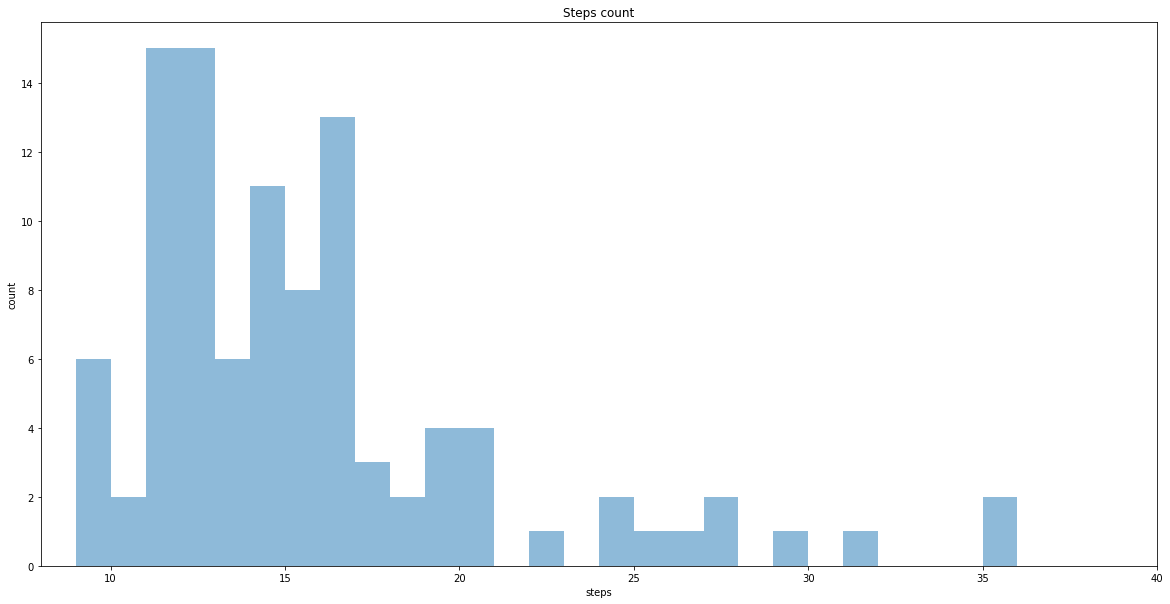

In [121]:
plt.figure(figsize=(20,10))
bins = np.arange(9, 40, 1) # fixed bin size

plt.xlim([8, 40])

plt.hist(ep_steps, bins=bins, alpha=0.5)
plt.title('Steps count')
plt.xlabel('steps')
plt.ylabel('count')

plt.show()

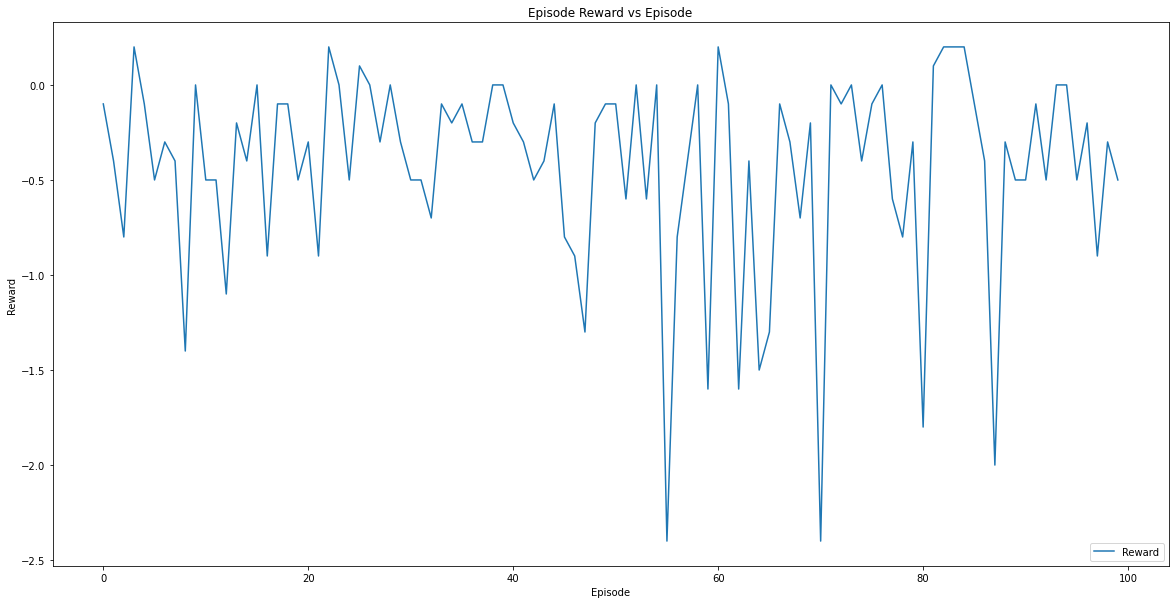

In [118]:
plt.figure(figsize=(20,10))
plt.plot(ep_rewards)
plt.title('Episode Reward vs Episode')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.legend(['Reward'], loc='lower right')
plt.show()

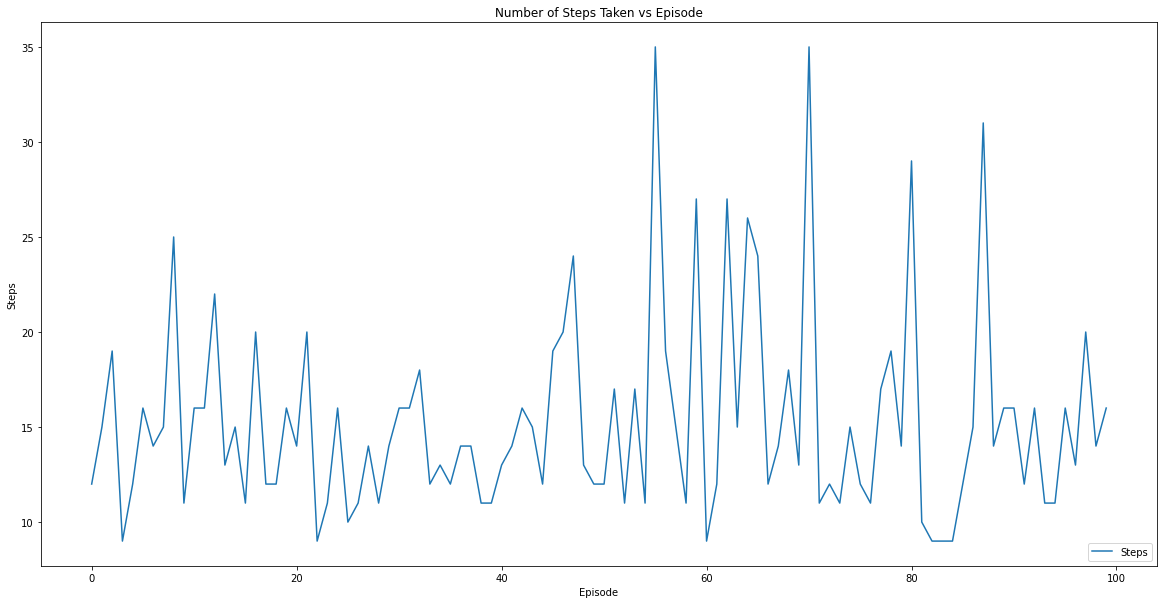

In [119]:
plt.figure(figsize=(20,10))
plt.plot(ep_steps)
plt.title('Number of Steps Taken vs Episode')
plt.ylabel('Steps')
plt.xlabel('Episode')
plt.legend(['Steps'], loc='lower right')
plt.show()